In [63]:
#Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [64]:
nyc=pd.read_csv("train.csv")

In [65]:
pd.set_option('display.max_columns', None)
nyc.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [66]:
nyc.shape

(74111, 29)

Our data has 74111 rows and 29 columns

In [67]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [68]:
nyc.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

We can see here that we have couple of columns having missing values which needs to be dealt with

Our data has log(price). Coverting it to exp using numpy to further analyze the data

In [69]:
nyc["price"]=np.exp(nyc.log_price)

In [70]:
nyc.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,145.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0


In [71]:
nyc.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868,160.370849
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142,168.580415
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,1.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000,75.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,111.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000,185.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,1999.000000


Exploring relationship between Price and Room Type

Text(0.5, 1.0, 'Room Type vs Price')

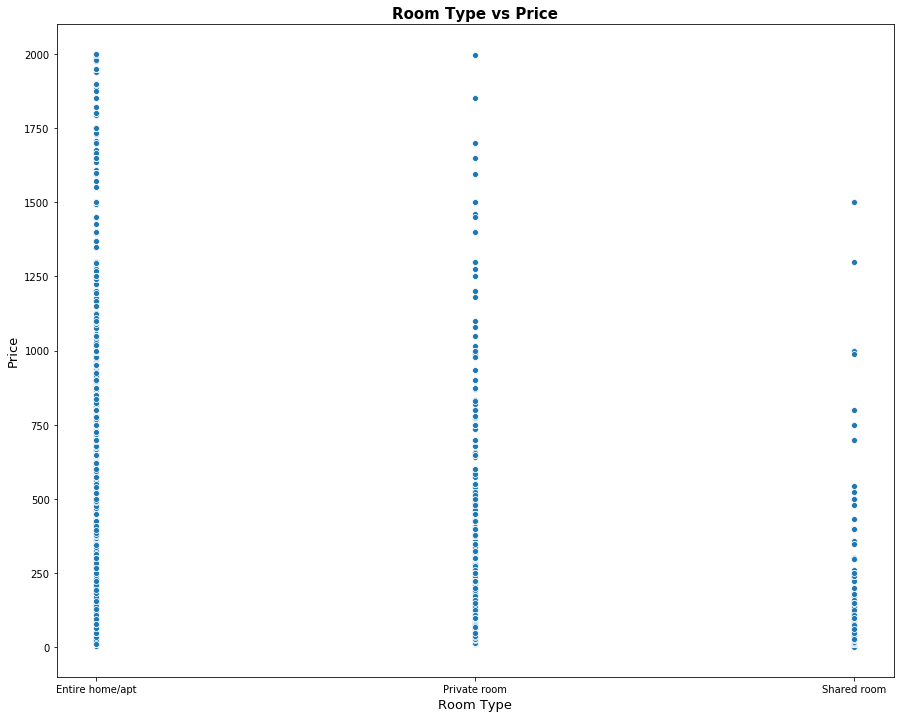

In [72]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=nyc)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

We can see that share room prices are least compared to Private and Entire

Exploring the distribution of Price in our dataset

Text(0.5, 1.0, 'Price Distribution Plot')

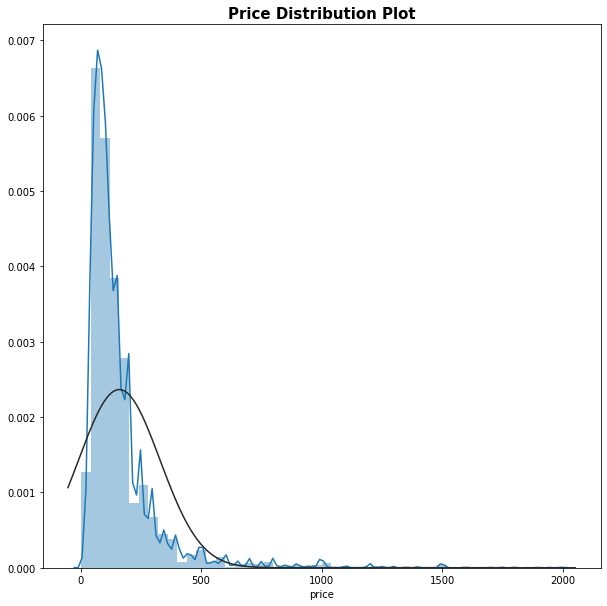

In [73]:
plt.figure(figsize=(10,10))
sns.distplot(nyc['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

Checking the distribution of Price, we can see that it is highly skewed towards right. It does make sense to use log(price) instead of price to decrease the skewness.

Text(0.5, 1.0, 'Price Distribution Plot')

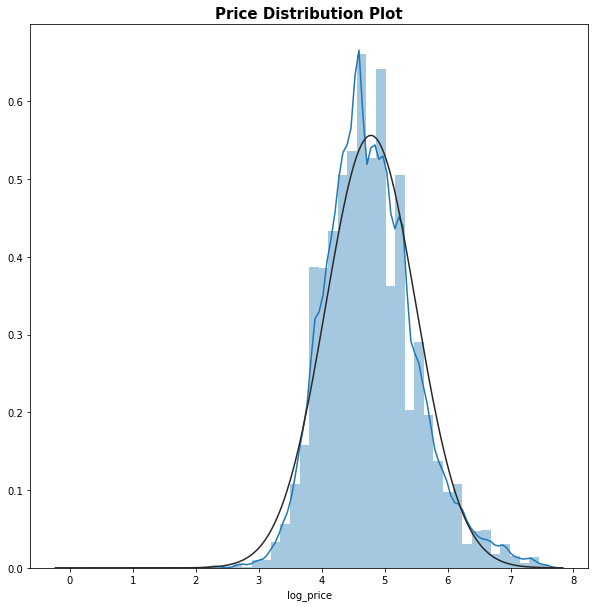

In [74]:
plt.figure(figsize=(10,10))
sns.distplot(nyc['log_price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [75]:
nyc.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
price         

Separating the numerical and categorical columns

In [76]:
nyc_cat=nyc.select_dtypes(exclude=["number","float_"])
nyc_num=nyc.select_dtypes(exclude=["bool_","object_"])

Plotting the distribution for numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5137C71C8>,
      dtype=object)

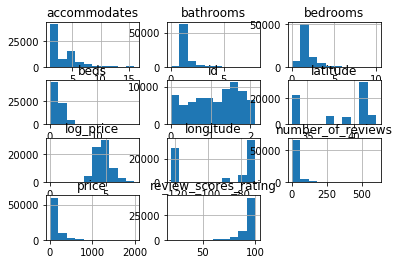

In [77]:
nyc_num.hist()

In [78]:
nyc.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
price                         0
dtype: int64

In [79]:
nyc_num.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868,160.370849
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142,168.580415
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,1.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000,75.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000,111.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000,185.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,1999.000000


Imputing null values for numerical columns

In [80]:
#Since 75% of the data is 1 we replace the null values for bathrooms with absolute value of mean
nyc.bathrooms=nyc.bathrooms.fillna(int(nyc.bathrooms.mean()))

#Since 75% of the data is 1 we replace the null values for bedrooms with absolute value of mean
nyc.bedrooms=nyc.bedrooms.fillna(int(nyc.bedrooms.mean()))

#Since more than 25% of the data is above 92 we replace null values with median
nyc.review_scores_rating=nyc.review_scores_rating.fillna(int(nyc.review_scores_rating.median()))

#Since 75% of the data is 1 we replace the null values for bedrooms with mean
nyc.beds=nyc.beds.fillna(int(nyc.beds.mean()))

In [81]:
nyc_cat.head()

,property_type,room_type,amenities,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,Beautiful brownstone 1-bedroom,Brooklyn Heights,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,https://a0.muscache.com/im/pictures/348a55fe-4...,10019
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,The Garden Oasis,Harlem,https://a0.muscache.com/im/pictures/6fae5362-9...,10027
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,Beautiful Flat in the Heart of SF!,Lower Haight,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,Great studio in midtown DC,Columbia Heights,NaN,20009


Getting rid of unnecessary columns for our analysis

In [82]:
nyc=nyc.drop(columns=['zipcode','thumbnail_url','name','last_review','host_since','first_review','description','id'])


In [83]:
nyc_cat=nyc_cat.drop(columns=['zipcode','thumbnail_url','name','last_review','host_since','first_review','description'])

In [84]:
nyc_cat.isnull().sum()

property_type                 0
room_type                     0
amenities                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
instant_bookable              0
neighbourhood              6872
dtype: int64

Analyzing distribution of Categorical columns having Null values

C:\Users\karan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


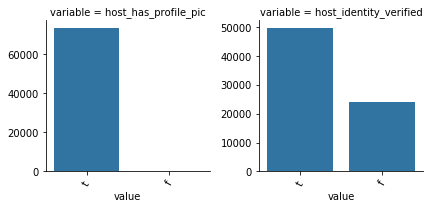

In [85]:
#Plotting Categorical Values to check the data distribution
f=pd.melt(nyc,value_vars=sorted(nyc_cat[['host_has_profile_pic','host_identity_verified']]))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Getting rid of the column host_response_rate because it has too many null values.

Replacing null values of neighbourhood with "Unknown".

Replacing null values of host_has_profile_pic and host_identity_verified with mode()

Replacing amenities with number of amenities available and dropping amenities


In [86]:
nyc=nyc.drop(columns=["host_response_rate"])
nyc.neighbourhood=nyc.neighbourhood.fillna("Unknown")
nyc.host_has_profile_pic=nyc.host_has_profile_pic.fillna(nyc.host_has_profile_pic.mode()[0])
nyc.host_identity_verified=nyc.host_identity_verified.fillna(nyc.host_identity_verified.mode()[0])

amenities_num=[]
for values in nyc["amenities"]:
    amenities_num.append(len(values.split(",")))
nyc["amenities_num"]=amenities_num

nyc=nyc.drop(columns=["amenities"])

We have now dealt with Null values and we have 20 features left for analysis

In [87]:
nyc.shape

(74111, 21)

In [88]:
nyc.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,price,amenities_num
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,40.696524,-73.991617,Brooklyn Heights,2,100.0,1.0,1.0,150.0,9
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,40.766115,-73.989040,Hell's Kitchen,6,93.0,3.0,3.0,169.0,15
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,40.808110,-73.943756,Harlem,10,92.0,1.0,3.0,145.0,19
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,f,37.772004,-122.431619,Lower Haight,0,96.0,2.0,2.0,750.0,15
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,38.925627,-77.034596,Columbia Heights,4,40.0,0.0,1.0,115.0,12


Exploring the relationship of numerical values and Price through correlation

Text(0.5, 1, 'Correlation Matrix')

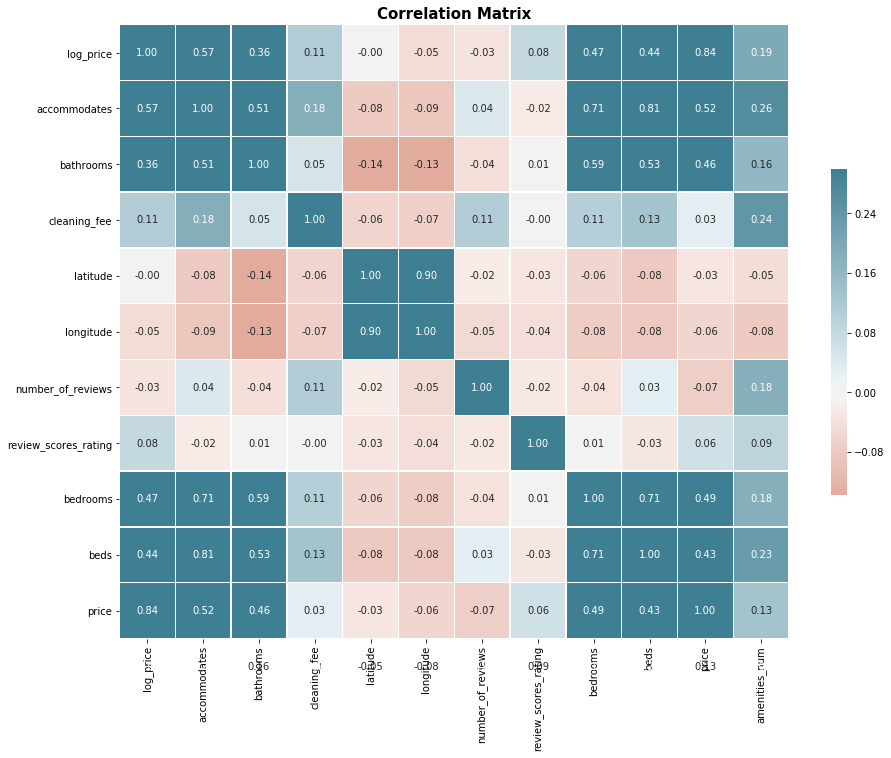

In [89]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=nyc.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

The correlation table shows that there is no strong relationship between price and other features. This indicates no numerical feature needs to be taken out of data. (Ignoring price and log_price effects, latitude and longitude)

In [90]:
nyc.cleaning_fee=nyc.cleaning_fee.astype(str)

In [91]:
nyc.dtypes

log_price                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee               object
city                       object
host_has_profile_pic       object
host_identity_verified     object
instant_bookable           object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
bedrooms                  float64
beds                      float64
price                     float64
amenities_num               int64
dtype: object

Creating dummy values for the following columns

In [92]:
#One hot encoding
categories=["property_type","room_type","bed_type","cancellation_policy","city"]

for i in categories:
    values=pd.get_dummies(nyc[i],columns=i,prefix=i)
    nyc=pd.concat([nyc, values], axis=1)
    nyc.drop([i],axis=1,inplace= True)

nyc.cleaning_fee=nyc.cleaning_fee.map({'True':1,'False':0}).astype(int)
nyc.host_has_profile_pic=nyc.host_has_profile_pic.map({'t':1,'f':0}).astype(int)
nyc.host_identity_verified=nyc.host_identity_verified.map({'t':1,'f':0}).astype(int)
nyc.instant_bookable=nyc.instant_bookable.map({'t':1,'f':0}).astype(int)



In [93]:
nyc['neighbourhood'] = nyc['neighbourhood'].astype("category").cat.codes

# FEATURE SELECTION AND GRID SEARCH

We will use Standard Scaler technique to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [94]:
nyc=nyc.drop(columns=["price","neighbourhood"],axis=1)

Separating the dependent and independent variables

In [95]:
X=nyc.loc[:,nyc.columns!='log_price']
y=nyc[['log_price']]
#X, y = nyc.iloc[:,1:], nyc.iloc[:,0]

In [96]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

Now we will build a feature importance graph. For this Extra Trees Classifier method will be used. 

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


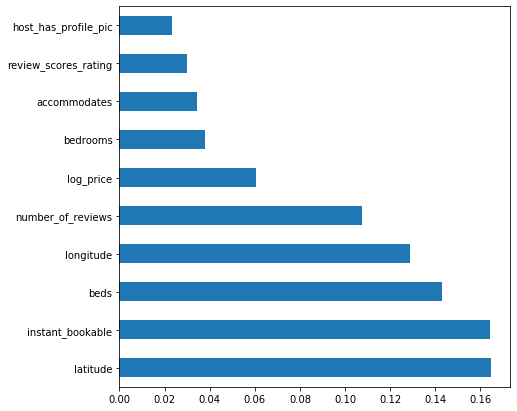

In [36]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=nyc.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

BUILDING ML MODELS ON OUR DATASET

# KNN REGRESSOR

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [38]:
%matplotlib inline
train_score_array = []
test_score_array = []

k=4
    
knn_reg = KNeighborsRegressor(k)
knn_reg.fit(X_train, y_train)
train_score_array.append(knn_reg.score(X_train, y_train))
test_score_array.append(knn_reg.score(X_test, y_test))

After running the regression for values of k between 1 to 9 we found the best k = 4

In [39]:
print(train_score_array)
print(test_score_array)
knn_pred= knn_reg.predict(X_test)

[0.7111999559409361]
[0.5148905257063314]


# Linear regression using the Normal Equation

In [40]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.5804791105279169
0.5738357216045878


If we use all the features for our analysis, linear regression gives train score of 58% and test score of 57%.


In [41]:
lreg_pred= lreg.predict(X_test)

# SGD Regressor

In [42]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 10, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-9.320171583130497e+25
-1.543884824187307e+26


C:\Users\karan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Our results are inconsistant with SGD Regressor

# POLYNOMIAL REGRESSOR

In [43]:
from  sklearn.preprocessing  import PolynomialFeatures

In [44]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [45]:
print(train_score_list)
print(test_score_list)

[0.5804953109069942, 0.652761967624383]
[0.5740000386664355, -3.173842616725634e+17]


Our results are inconsistant with higher degree

# RIDGE

Text(0.5, 0, '$\\alpha$')

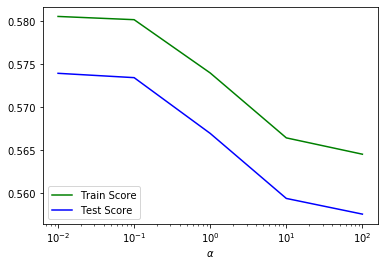

In [46]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [47]:
from  sklearn.linear_model import Ridge

#Best for - 
x_range = [0.01]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

ridge_pred= ridge.predict(X_test)


In [48]:
print(train_score_list)
print(test_score_list)

[0.5805493235617762]
[0.5739428996073024]


# LASSO

Text(0.5, 0, '$\\alpha$')

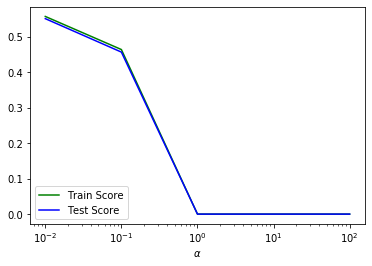

In [49]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [50]:
from sklearn.linear_model import Lasso
#x_range = [0.01, 0.1, 1, 10, 100]
#Best for - 
x_range = [0.01]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
lasso_pred= lasso.predict(X_test)

In [51]:
print(train_score_list)
print(test_score_list)

[0.5564902080256076]
[0.5502885968502564]


# RANDOM FOREST REGRESSION

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf_reg=RandomForestRegressor(max_depth=10, random_state=0)

In [105]:
rf_reg.fit(X_train,y_train)
print(rf_reg.score(X_train,y_train))
print(rf_reg.score(X_test,y_test))

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.7171235394112453
0.6653434469367051


In [106]:
rf_reg_pred=rf_reg.predict(X_test)

# MODEL COMPARISON

In [107]:
print('-------------KNN Regressor-----------')

print('MAE: %f'% mean_absolute_error(y_test, knn_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, knn_pred)))   
print('R2 %f' % r2_score(y_test, knn_pred))

print('---------------Linear Regressor---------------------')

print('MAE: %f'% mean_absolute_error(y_test, lreg_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lreg_pred)))   
print('R2 %f' % r2_score(y_test, lreg_pred))

print('---------------Ridge-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, ridge_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, ridge_pred)))
print('R2 %f' % r2_score(y_test, ridge_pred))

print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, lasso_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, lasso_pred)))
print('R2 %f' % r2_score(y_test, lasso_pred))

print('---------------Random Forest-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, rf_reg_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, rf_reg_pred)))
print('R2 %f' % r2_score(y_test, rf_reg_pred))

-------------KNN Regressor-----------
MAE: 0.374626
RMSE: 0.501614
R2 0.514891
---------------Linear Regressor---------------------
MAE: 0.351053
RMSE: 0.470152
R2 0.573836
---------------Ridge-----------------------
MAE: 0.350978
RMSE: 0.470093
R2 0.573943
---------------Lasso-----------------------
MAE: 0.362507
RMSE: 0.482966
R2 0.550289
---------------Random Forest-----------------------
MAE: 0.303068
RMSE: 0.416629
R2 0.665343


# SUPPORT VECTOR REGRESSOR

Using 10,000 rows to test all the SVR 

In [53]:
nyc=nyc[:10000]

In [54]:
X=nyc.loc[:,nyc.columns!='log_price']
y=nyc[['log_price']]
#X, y = nyc.iloc[:,1:], nyc.iloc[:,0]

In [55]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [56]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [57]:
from sklearn.svm import SVR

In [58]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [59]:
svr_rbf.fit(X_train,y_train)
print(svr_rbf.score(X_train, y_train))
print(svr_rbf.score(X_test, y_test))
svr_rbf_pred=svr_rbf.predict(X_test)

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9123329685977218
0.16831117713962884


In [60]:
svr_lin.fit(X_train,y_train)
print(svr_lin.score(X_train, y_train))
print(svr_lin.score(X_test, y_test))
svr_lin_pred=svr_lin.predict(X_test)

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5655739749966322
0.5650121332550906


In [61]:
svr_poly.fit(X_train,y_train)
print(svr_poly.score(X_train, y_train))
print(svr_poly.score(X_test, y_test))
svr_poly_pred=svr_poly.predict(X_test)

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7155149492360826
0.11555667594125352


# MODEL COMPARISON

In [62]:
print('---------------SVR RBF-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, svr_rbf_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, svr_rbf_pred)))
print('R2 %f' % r2_score(y_test, svr_rbf_pred))

print('---------------SVR Linear-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, svr_lin_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, svr_lin_pred)))
print('R2 %f' % r2_score(y_test, svr_lin_pred))

print('---------------SVR Poly-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, svr_poly_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, svr_poly_pred)))
print('R2 %f' % r2_score(y_test, svr_poly_pred))



---------------SVR RBF-----------------------
MAE: 0.482944
RMSE: 0.643066
R2 0.168311
---------------SVR Linear-----------------------
MAE: 0.350268
RMSE: 0.465065
R2 0.565012
---------------SVR Poly-----------------------
MAE: 0.418160
RMSE: 0.663147
R2 0.115557


After our analysis, Random Forest, KNN regressor and Linear regressor are the best performing models followed by SVR Linear.

Hence, we chose Random Forest as the best regression model and our results are already for the entire dataset.